In [3]:
import os

# Crear la carpeta oculta .kaggle en la ubicación que espera la API
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Copiar tu kaggle.json desde tu carpeta actual a esa ubicación
import shutil
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Cambiar permisos (esto es importante solo en Linux/Mac, no afecta en Windows)
try:
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)
except:
    pass

print("Archivo kaggle.json copiado correctamente.")



Archivo kaggle.json copiado correctamente.


In [4]:
!kaggle datasets list -s "titanic"


ref                                  title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
heptapod/titanic                     Titanic                                             11090  2017-05-16 08:14:22.210000         110352       1582  0.7058824        
brendan45774/test-file               Titanic dataset                                     11514  2021-12-02 16:11:42.367000         172551       1348  1.0              
yasserh/titanic-dataset              Titanic Dataset                                     22564  2021-12-24 14:53:06.913000         139429        447  1.0              
azeembootwala/titanic                Titanic                                             12406  2017-06-05 12:14:37.477000          23620        197  0.8235294 

In [5]:
!kaggle datasets download -d heptapod/titanic -p datos --unzip


Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic
License(s): DbCL-1.0


In [6]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv("datos/train_and_test2.csv")

# Mostrar las primeras filas
df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [7]:
# Resumen estadístico de todas las columnas numéricas
df.describe()

# También puedes ver si hay datos nulos
df.isnull().sum()


Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

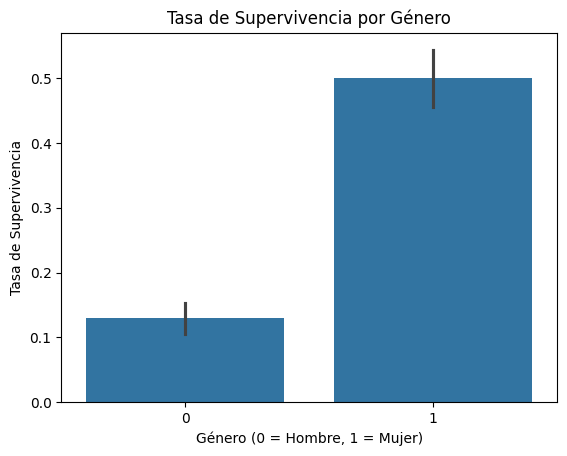

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cambiar nombre de columnas si es necesario
df = df.rename(columns={'Sex': 'sex', '2urvived': 'survived'})  # corregir nombres para evitar errores

# Crear un gráfico de barras de tasa de supervivencia por género
sns.barplot(x='sex', y='survived', data=df)

plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Género (0 = Hombre, 1 = Mujer)')
plt.show()


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definir variables predictoras y objetivo
X = df[["Age", "Fare", "sex", "Pclass"]]
y = df["survived"]

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [11]:
# Crear el modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2f}")


Precisión del modelo: 0.75


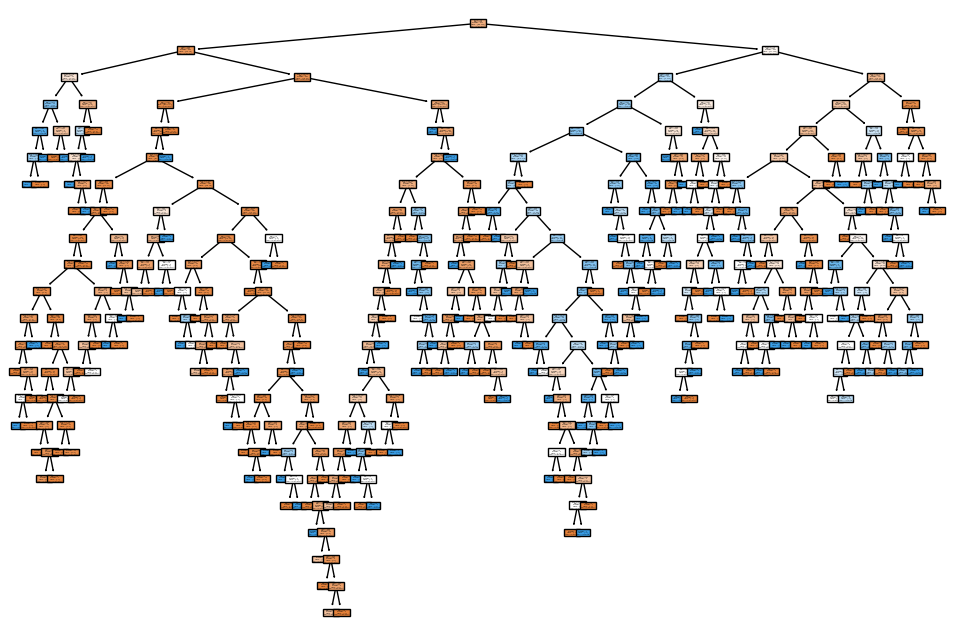

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(modelo, feature_names=["Age", "Fare", "sex", "Pclass"], class_names=["No sobrevivió", "Sobrevivió"], filled=True)
plt.show()


In [14]:
!pip install kagglehub



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import kagglehub

# Descargar la última versión del dataset
path = kagglehub.dataset_download("oscardavidperilla/domestic-violence-in-colombia")

print("Path to dataset files:", path)


100%|█████████████████████████████████████████████████████████████████████████████| 3.02M/3.02M [00:00<00:00, 6.78MB/s]

Extracting files...


Path to dataset files: C:\Users\lebre\.cache\kagglehub\datasets\oscardavidperilla\domestic-violence-in-colombia\versions\1
